## using lightkurve.seismology
* https://docs.lightkurve.org/tutorials/02-asteroseismology.html

## Examples
* https://arxiv.org/pdf/2010.07323.pdf: HD 38529 hosts a planet and brown dwarf
* https://arxiv.org/pdf/1909.05961.pdf: HD 212771

In [2]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
sc = cr.ShortCadence(name='HD 38529')
lc = sc.get_lc()

Target: HD 38529
Available sectors: [6]
Using sector=6.
Using TESS short cadence.

Searching lightcurvefile for <SkyCoord (ICRS): (ra, dec) in deg
    (86.64547079, 1.16819793)> (sector 6)
Found 1 lightcurves


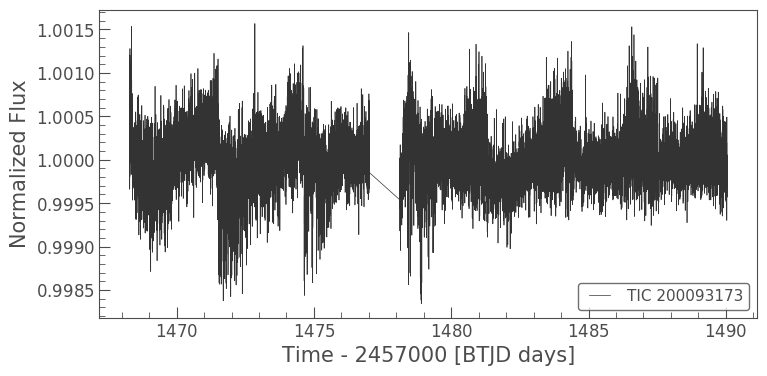

In [4]:
lc = lc.remove_outliers().remove_nans()
lc.plot();

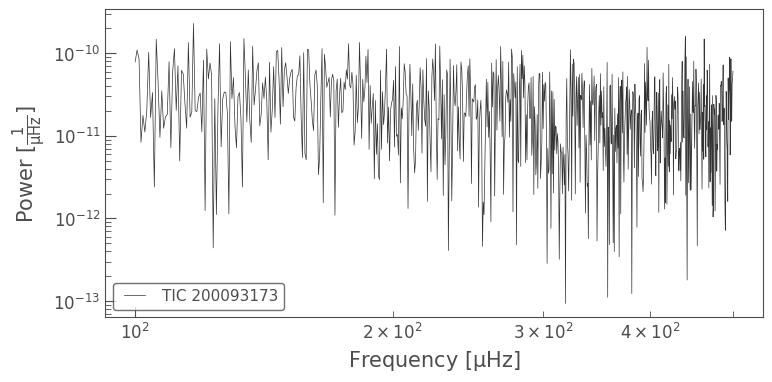

In [5]:
pg = lc.to_periodogram(method='lombscargle', normalization='psd',
                       minimum_frequency=100, maximum_frequency=500)
pg.plot(scale='log');

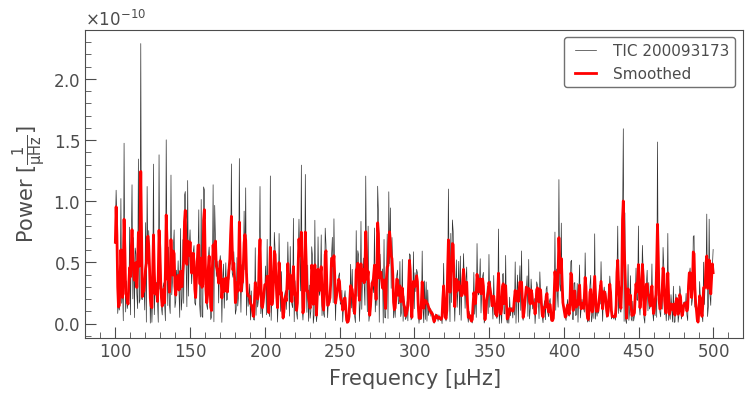

In [6]:
ax = pg.plot()
pg.smooth(method='boxkernel', filter_width=1.).plot(ax=ax, label='Smoothed', c='red', lw=2);

In [7]:
#nu_max = 226.6 ± 9.4 (paper)
pg.frequency_at_max_power

<Quantity 117.01138555 uHz>

In [8]:
pg.show_properties()

lightkurve.Periodogram properties:
      Attribute         Description    Units 
---------------------- -------------- -------
                nterms              1        
              targetid      200093173        
          default_view      frequency        
                 label  TIC 200093173        
             ls_method           fast        
frequency_at_max_power       117.0114     uHz
             max_power            0.0 1 / uHz
               nyquist      4166.7222     uHz
   period_at_max_power         0.0085 1 / uHz
             frequency   array (753,)     uHz
                period   array (753,) 1 / uHz
                 power   array (753,) 1 / uHz
                  meta <class 'dict'>        


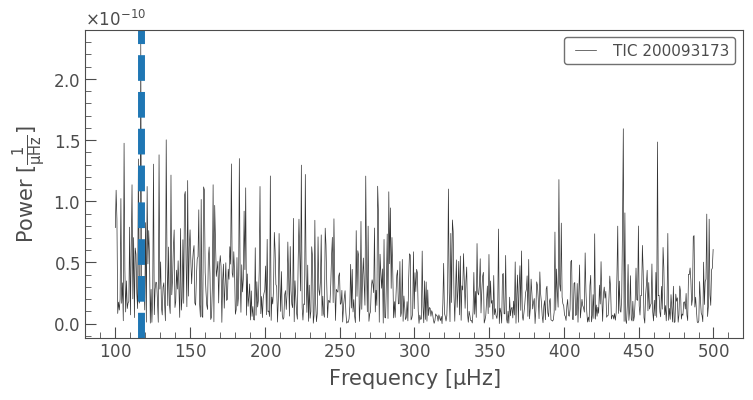

In [9]:
ax = pg.plot()
ax.axvline(pg.frequency_at_max_power.value, lw=5, ls='dashed');

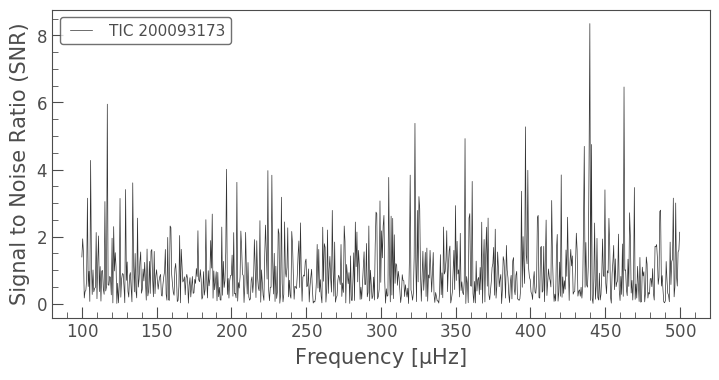

In [10]:
snr = pg.flatten()
snr.plot();

In [11]:
seis = snr.to_seismology()
seis

Seismology(ID: TIC 200093173) - no values have been computed so far.

In [12]:
numax = seis.estimate_numax()
numax

numax: 441.50 uHz (method: ACF2D)

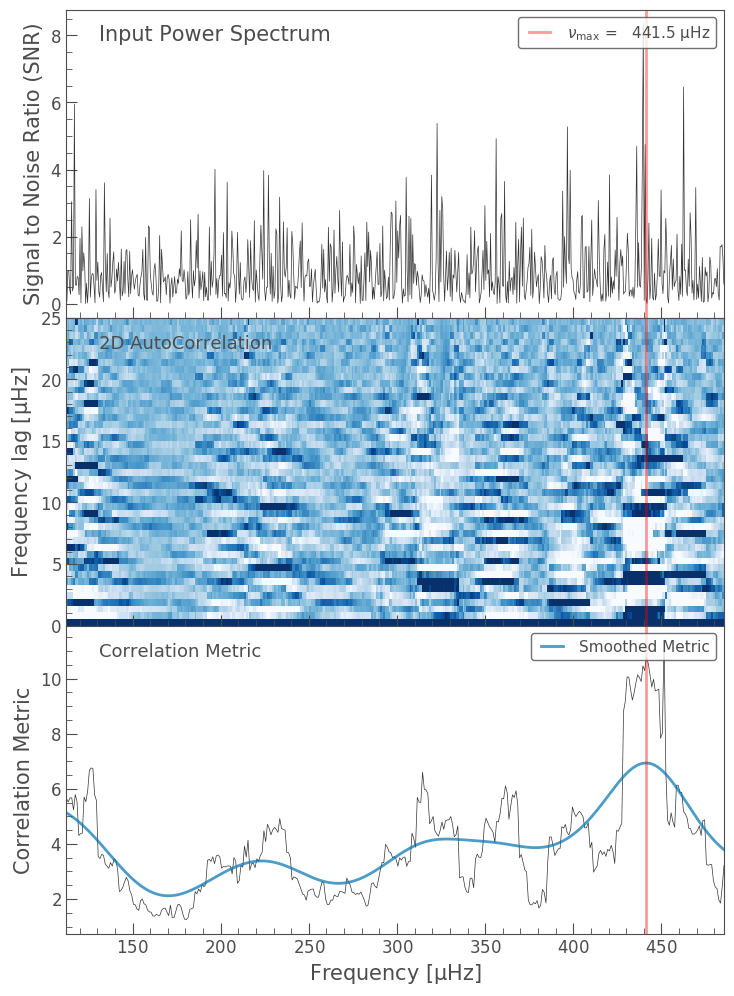

In [13]:
seis.diagnose_numax();

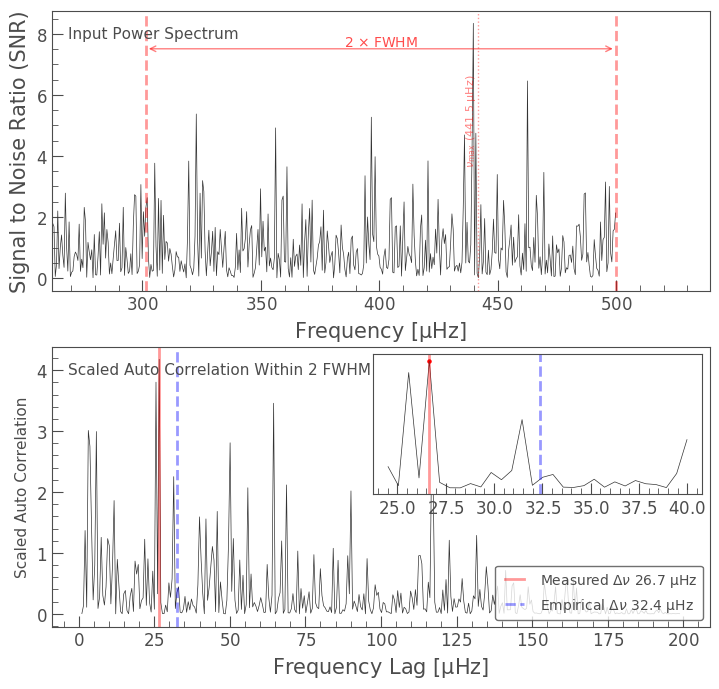

In [14]:
deltanu = seis.estimate_deltanu()
ax = seis.diagnose_deltanu();

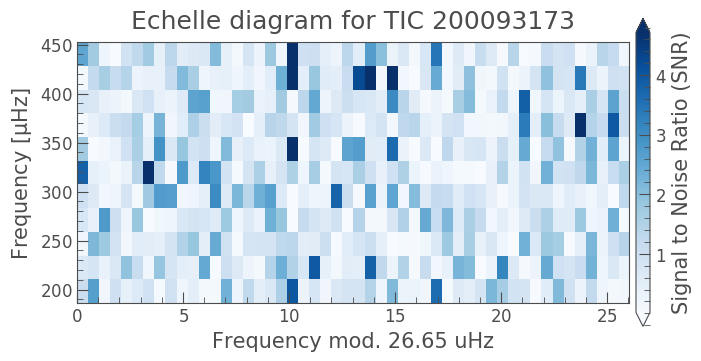

In [15]:
seis.plot_echelle();

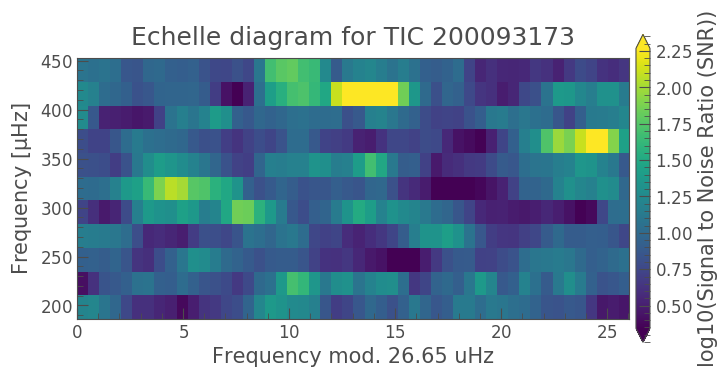

In [16]:
seis.plot_echelle(smooth_filter_width=3., scale='log', cmap='viridis');

In [31]:
tic_params = sc.query_tic_catalog()
tic_params.Teff

Querying TIC catalog for ra,dec=(336.763 -17.2637) within 3.0 arcsec.


5003.0

In [32]:
mass = seis.estimate_mass(tic_params.Teff)
mass

mass: 1.19 solMass (method: Uncorrected Scaling Relations)

In [33]:
radius = seis.estimate_radius(tic_params.Teff)
radius

radius: 4.30 solRad (method: Uncorrected Scaling Relations)

In [34]:
logg = seis.estimate_logg(tic_params.Teff)
logg

logg: 3.25 dex (method: Uncorrected Scaling Relations)